In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC


In [46]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
path = "/content/gdrive/MyDrive/PRAKTIKUM ML/Praktikum06"

In [48]:
df = pd.read_csv(path + '/data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [50]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [51]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [52]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [53]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

#Kolom Target (label)
y= df['Species']

In [54]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Membua model SVM dengan kernel Linear
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [57]:
y_pred = model.predict(X_test)
#Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
#Laporan klasifikasi
print("\nLaporan Klasifikasi:n/", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:n/                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30




Confusion Matrix : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


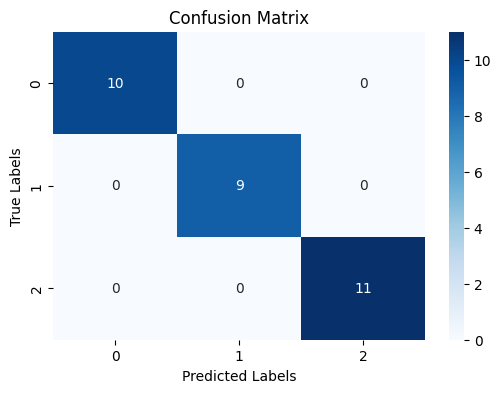

In [58]:
print("\nConfusion Matrix : \n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

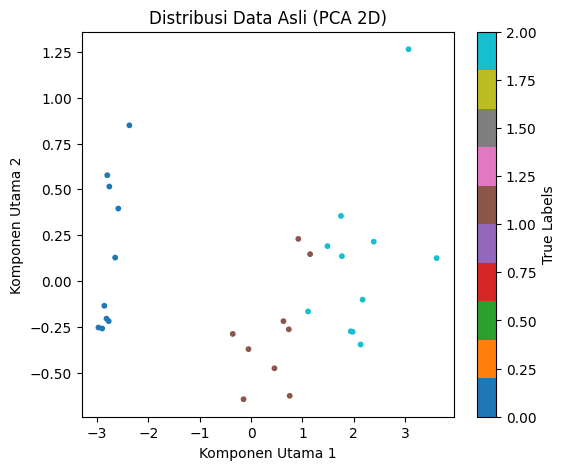

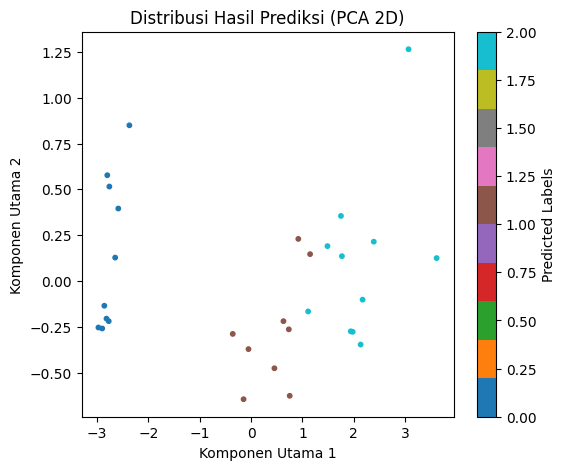

In [59]:
# Misal kamu sudah punya:
# X_train, X_test, y_train, y_test, y_pred

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# --- 1. Reduci dimensi jadi 2D untuk visualisasi ---
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# --- Encode labels ---
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# --- 2. Plot berdasarkan label asli ---
plt.figure(figsize=(6,5))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
            c=y_test_encoded, cmap='tab10', s=10)
plt.title('Distribusi Data Asli (PCA 2D)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='True Labels')
plt.show()

# --- 3. Plot berdasarkan label prediksi ---
plt.figure(figsize=(6,5))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
            c=y_pred_encoded, cmap='tab10', s=10)
plt.title('Distribusi Hasil Prediksi (PCA 2D)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Predicted Labels')
plt.show()

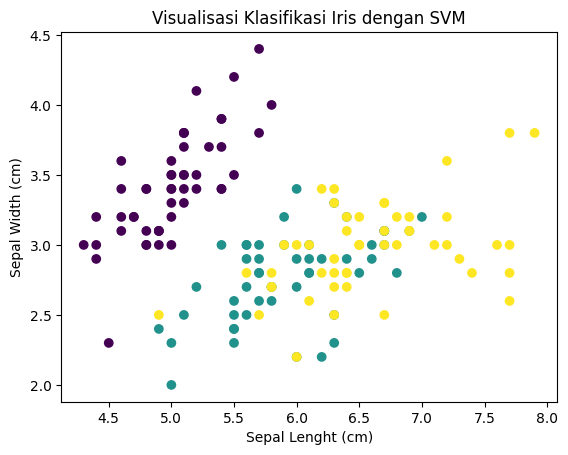

In [66]:
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].astype('category').cat.codes)
plt.xlabel('Sepal Lenght (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Visualisasi Klasifikasi Iris dengan SVM')
plt.show()

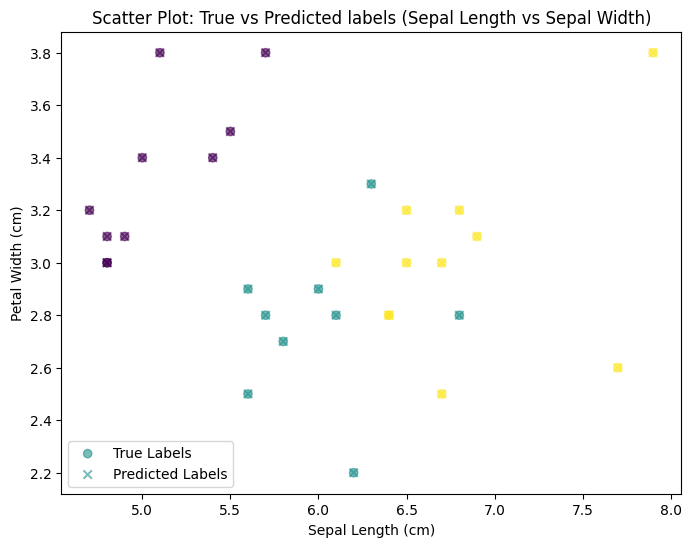

In [61]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

plt.figure(figsize=(8, 6))

# plot titik berdasarkan label asli
plt.scatter(
    X_test['SepalLengthCm'],
    X_test['SepalWidthCm'],
    c=y_test_encoded,
    cmap='viridis',
    marker='o',
    label='True Labels',
    alpha=0.6
)

# plot titik berdasarkan label hasil prediksi
plt.scatter(
    X_test['SepalLengthCm'],
    X_test['SepalWidthCm'],
    c=y_pred_encoded,
    cmap='viridis',
    marker='x',
    label='Predicted Labels',
    alpha=0.6
)

plt.title("Scatter Plot: True vs Predicted labels (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.show()

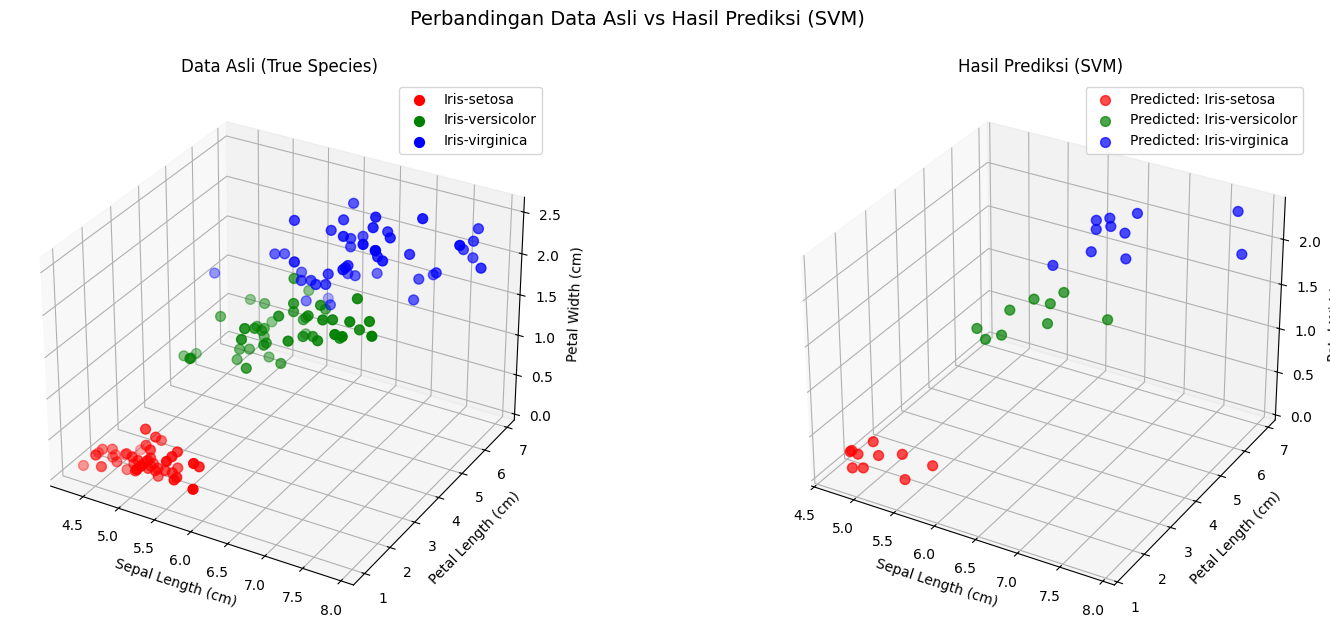

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

# 3. Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

# 8. Plot 3D hasil klasifikasi (asli vs prediksi)
fig = plt.figure(figsize=(18, 7))

# Warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

# ========== Plot Data Asli ==========
ax1 = fig.add_subplot(121, projection='3d')
for i, species in enumerate(labels):
    subset = df[df['SpeciesEncoded'] == i]
    ax1.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        subset['PetalWidthCm'],
        color=colors[i],
        label=species,
        s=50
    )

ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Petal Length (cm)')
ax1.set_zlabel('Petal Width (cm)')
ax1.set_title('Data Asli (True Species)')
ax1.legend()

# ========== Plot Data Prediksi ==========
# Simpan hasil prediksi ke dataframe
df['Predicted'] = None
df.loc[X_test.index, 'Predicted'] = y_pred

# Encode hasil prediksi (jika masih teks)
if df['Predicted'].dtype == 'object':
    df.loc[X_test.index, 'PredictedEncoded'] = le.transform(df.loc[X_test.index, 'Predicted'])
else:
    df['PredictedEncoded'] = df['Predicted']

ax2 = fig.add_subplot(122, projection='3d')
for i, species in enumerate(labels):
    species_label = le.inverse_transform([i])[0]  # ubah angka ke label species
    subset = df[df['PredictedEncoded'] == i]
    ax2.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        subset['PetalWidthCm'],
        color=colors[i],
        label=f"Predicted: {species_label}",
        s=50,
        alpha=0.7
    )

ax2.set_xlabel('Sepal Length (cm)')
ax2.set_ylabel('Petal Length (cm)')
ax2.set_zlabel('Petal Width (cm)')
ax2.set_title('Hasil Prediksi (SVM)')
ax2.legend()

plt.suptitle('Perbandingan Data Asli vs Hasil Prediksi (SVM)', fontsize=14)
plt.show()

In [63]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk SVM
parameters = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(random_state=0),
    param_grid=parameters,
    n_jobs=6,
    verbose=1,
    scoring='accuracy'
)

# Melatih model dengan data pelatihan
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [64]:
print (f'Best score: {grid_search.best_score_}')

# Access best_params_ from the grid_search object
best_params = grid_search.best_params_
print (f'Best parameters: {best_params}')
for param in parameters:
  print (f'\t{param}: {best_params[param]}')

Best score: 0.9583333333333334
Best parameters: {'C': 0.5, 'gamma': 0.1, 'kernel': 'poly'}
	kernel: poly
	C: 0.5
	gamma: 0.1


In [65]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

